# Dealing with data and intro to Pandas

_This notebook is adapted by Shannon Tubridy from materials authored by Todd Gureckis and Kelsey Moty and released under a [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/) license._

#### Data files used in this notebook

The csv files loaded in this notebook are on Brightspace under Data in the pandas_data_1.zip file.

In this notebook files are loaded using relative paths. Specifically, the assumption is that one level up from the location of this notebook is a folder called `pandas_data_1` and that the various files are in there.

You should download the zip file, but it one level up from wherever your notebooks are, and unzip the file.

## How to think about data and organize it

When we start accumulating and using data we need to start thinking abstractly about **organizing** our measurements into some type of collection that can help us keep track of things like the order in which measurements were made, or the relationship between different datapoints.

### Lists

- Lists are simple data types that we've already learned about. 
- Lists work well for one-dimensional data (data where there is a single kind of measurement) 
- Access values in lists is by position-based indexing

In [2]:
sites = ['NYC', 'Beijing', 'Cairo', 'Bogota']

In [3]:
# find whether and where 'Cairo' is in sites:
sites[2]

'Cairo'

#### Lists can be used to do basic math like calculating an average of some numbers

In [4]:
nyc_monthly_cases = [1152, 
                     954, 
                     987, 
                     1014, 
                     876, 
                     854, 
                     987, 
                     1090, 
                     1011, 
                     921, 
                     842, 
                     821]

In [5]:
# compute the average or mean value of a 
# list using sum() and len() functions:

In [6]:
sum(nyc_monthly_cases)/len(nyc_monthly_cases)

959.0833333333334

### Multi-dimensional data

In many cases we will have data that have at least two dimensions on which we have measurements.

For example:

- a behavioral experiment with a set of people (dimension 1) and their performance on some assessment (dimension 2)

- crime rates (dimension 1) in different neighborhoods within a city (dimension 2)

- a measure of behavior like working memory accuracy (dimension 1) and simultaneous fMRI measurements from an area in visual cortex (dimension 2)

- fMRI activation measurements (dimension 1) at each location in a 3D space (dimensions 2,3, and 4) measured over time (dimension 5)

The assignment of a particular measurement to a particular dimension is arbitrary, but in each of these examples there are two or more kinds of data that need to stay in alignment.

A list of lists, approximating a matrix, is one way to handle this.

Imagine 3 people in a study and we have 4 measuremnts for each. 

A list of lists storing these data might look like this, where rows are people and "columns", or the sub-elements of each list, are the individual measurements within each person:

<div>
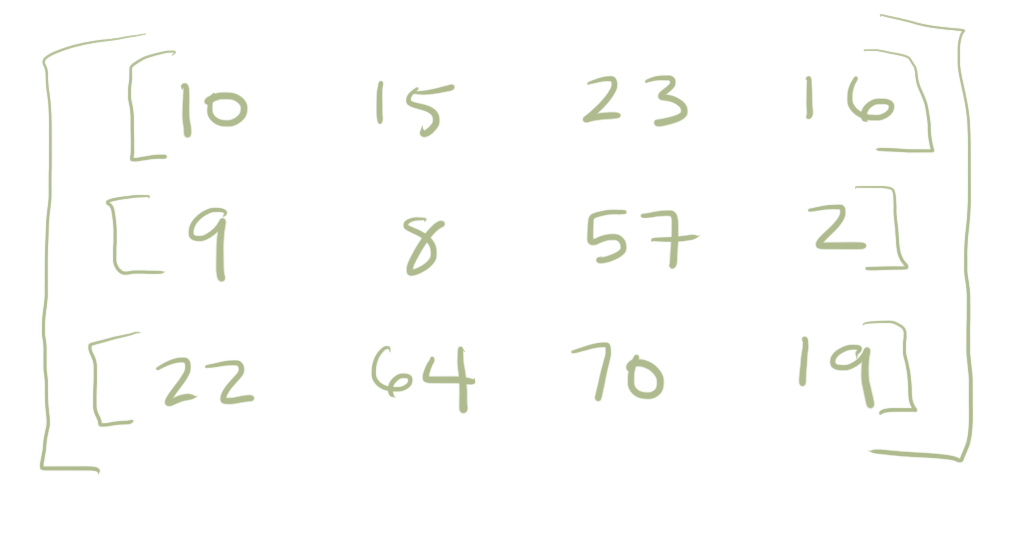
</div>


In [8]:
# define three individual lists of numbers
p1 = [10, 15, 23, 16]
p2 = [9, 8, 57, 2]
p3 = [22, 64, 70, 19]

In [9]:
# make a new list of the lists
all_data = [p1,p2,p3]

In [10]:
all_data

[[10, 15, 23, 16], [9, 8, 57, 2], [22, 64, 70, 19]]

In [11]:
# access one of the lists using regular 
# list indexing and square brackets
all_data[1]

[9, 8, 57, 2]

In [12]:
# indexing the individual lists happens 
# with a second set of square brackets

# get the second element in the first list:

all_data[2][1]

64

In [13]:
# get all the elements in the third list:
all_data[2][:]

[22, 64, 70, 19]

Lists of lists are simple objects, but it can be confusing to keep track of which dimension is which.

Are the rows or the columns the people in the example above?  

It is nice to have data stored along with additional information.

<br>
<div>
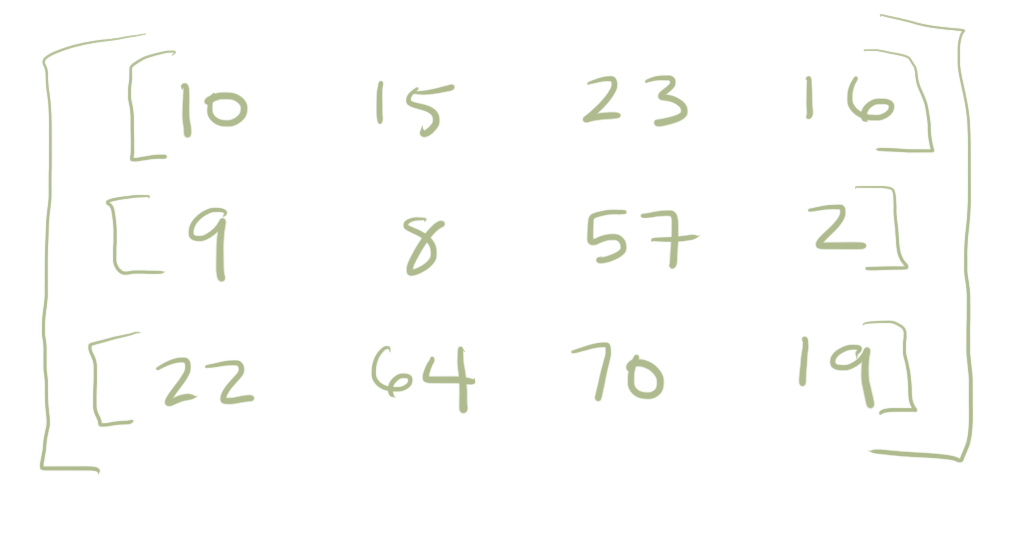
</div>



### Metadata and data file formats

**metadata** refers to data or information that *describes* other data. 

An example would be a column name or a row index in a spreadsheet.

Here is a excel sheet


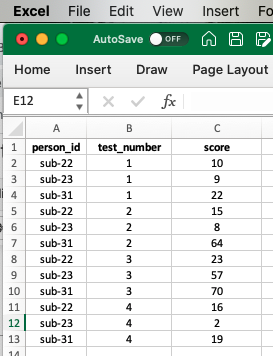

This a snapshot of a file encoding for the spreadsheet visualized above. You can find the actual data in there (look for sub-22, sub-23, and sub-31) but also a bunch of other information like column names, data types (strings and numbers), font name and size, etc. and it's all in a hierarchical structure with tags.

<br>

<div>
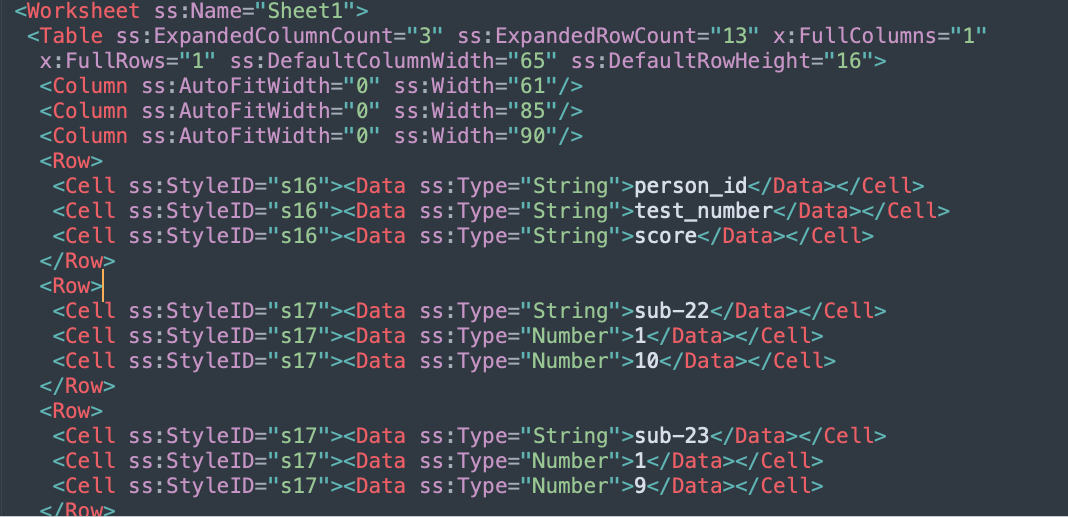
</div>

<br>

This formatted structure enables storing lots of additional information like column names and style along with the data.

This can come at the cost of complexity in the file, as in the excel above, and can make it difficult (but not impossible) to use xlsx with other software.

To avoid this and facilitate the sharing and re-use of data, ***it is prefereable that data is stored using _plain-test formats_ such as txt and csv files.***

### Comma-separated Values (.csv files)

- CSV, or Comma-separated value files, are written using a plain-text format. No special tags, just text. 

- The only indication of columns are the commas used to delimit different values for columns and new lines to indicate rows.

We will make extensive use of csv files as we read data into Python using the Pandas library and to save new analyses back to file for storage or sharing.

Here's the same dataset as before but now as a CSV file:



<div>
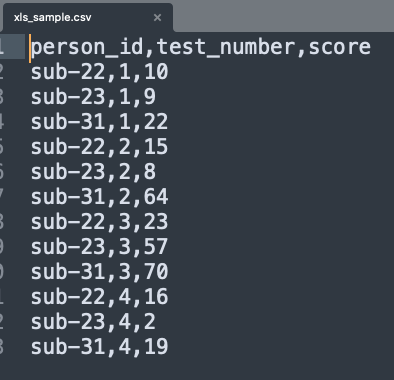
</div>


- CSV files are limited in what you can store: no images or font formatting, for example

- Simplicity of csv files makes them great for storing and sharing data 

- CSV files can be opened by many applications, including Python, R, Excel and Google Sheets, making them accessible to others.

#### Tab-separated Values (.tsv files)
TSV files are very similar to CSV files, except that instead of using a comma to delimit between values in a dataset, it uses tabs (a special type of spacing, the same type you get when you hit the tab key on your computer). We will revisit this soon when we load some data into Python from a file.

#### .txt files
Filename extensions don't actually change anything in the underlying file and instead are used as signals to software (and people) about the structure of what's inside the file. The .txt file extension is another commonly used extension that indicates plain text.

#### Exporting Google and Excel spreadsheets to csv

To export a .csv file from Google Sheets, you click on File > Download > Comma-separated values (.csv). 

To create a .csv file from Excel, click on the File menu and select Save As. Choose plain csv as the type<br>


Both Excel and Google enable a spreadsheet to have multiple worksheets. CSV files have no way to track this so individual worksheets have to be saved to separate csv files.

## The Pandas library for Python

[Pandas](https://pandas.pydata.org) is an open-source project for Python that provides a data analysis and manipulation tool.  

Pandas gives you a way to interact with a dataset organized like a spreadsheet (meaning columns and rows which are possibly named or labeled with meta data) in order to perform sophisticated data analyses. 

This data structure is called a **dataframe**.  

<br>


<div>
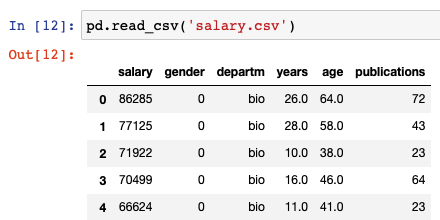
</div>



<div class="alert alert-warning" role="alert">
Pandas can be confusing! It can be difficult to "get" Pandas at first, but when it clicks it can open a universe of data management and analysis. It takes some patience in part because data manipulation is a very complex topic at least at the conceptual level.
</div>

We won't go through a complete description of everything in Pandas, but you should get a sense of how to use Pandas (with code) to do the kinds of tasks typically done in a spreadsheet like Excel or Google Sheets.

## pandas.read_csv(), Import pandas within each session

The first step of using Pandas is to load it into your current Python session using `import`.

The import_libraries.ipynb notebook has basic info on the `import` command.

In an actual project the import statements usually go at the top of a file.

In [14]:
# load the pandas library
import pandas as pd

By importing `as pd` we can access the pandas code by typing `pd` rather than `pandas`.

In [15]:
# Also load the "numpy" library to use some 
# random number generators
import numpy as np

# seaborn is a plotting library
import seaborn as sns

We will break down the loading of csv's coming up. For now we'll just load some data to give us a feel for what we're working with.

**NOTE**: The cell below assumes that there is a file called `salary.csv` in a folder called data that is up one level from this notebook. See _file_paths.ipynb_ for more info.

In [16]:
import os
os.getcwd()

'D:\\A-NYU\\Python_JupterNotebook_Workspace\\Scientific programming_Spring_22\\Codes_inclass'

In [18]:
pd.read_csv('../pandas_intro_data/salary.csv')

salary  gender departm  years   age  publications
0    86285       0     bio   26.0  64.0            72
1    77125       0     bio   28.0  58.0            43
2    71922       0     bio   10.0  38.0            23
3    70499       0     bio   16.0  46.0            64
4    66624       0     bio   11.0  41.0            23
..     ...     ...     ...    ...   ...           ...
72   53662       1   neuro    1.0  31.0             3
73   57185       1    stat    9.0  39.0             7
74   52254       1    stat    2.0  32.0             9
75   61885       1    math   23.0  60.0             9
76   49542       1    math    3.0  33.0             5

[77 rows x 6 columns]

## Reading data (e.g., csvs) into Python using Pandas

Pandas can be used to create data frames from data or information generated within your code or by reading in data saved to file. First let's understand how to read some saved data into a dataframe object.  

Often you are reading data in from some other file (e.g., a CSV file) and "loading" it into Pandas.  

When reading in your .csv file, there are two things you have to do:

1) Tell pandas where to find the file

2) Store your data into a variable

### 1) tell `pd.read_csv()` where the file you are trying to import is located

`pd.read_csv()` has one required input: the path or location of a file you want to load.

If the .csv file and your notebook are in the same folder, you only have to put the name of the file or a single dot+forward slash (`./`) plus the file name to indicate that the thing after the slash as at the same directory level as the current notebook working directory.

In [ ]:
pd.read_csv('./salary.csv')

#### Relative paths

In a well organized project your data file will be saved in a folder that's not in the same folder as your notebook as in the image below. 

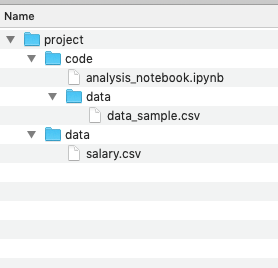

In this example the two csv files would be in the following "relative path" relationships to the `code` folder.

`data_sample.csv` 

_./data/data_sample.csv_

- The single dot means from the current location look for everything after the first slash

`salary.csv` 
_../data/salary.csv_

- The double dots means go up one level from the current location (e.g., the 'code' folder) and then from there look for everything after the forward slash.

#### What is the relative path from data_sample.csv to salary.csv?

You can stack the relative path notation together.

`../../` would mean go up _two_ levels from the current location.

#### Loading a csv using the relative to path

The next cell looks goes up one level from the working directory (like where you launched the notebook from), looks for a `data` directory, and then looks for `salary.csv` inside of there.

In [ ]:
import pandas as pd

In [20]:
pd.read_csv('../pandas_intro_data/salary.csv')

salary  gender departm  years   age  publications
0    86285       0     bio   26.0  64.0            72
1    77125       0     bio   28.0  58.0            43
2    71922       0     bio   10.0  38.0            23
3    70499       0     bio   16.0  46.0            64
4    66624       0     bio   11.0  41.0            23
..     ...     ...     ...    ...   ...           ...
72   53662       1   neuro    1.0  31.0             3
73   57185       1    stat    9.0  39.0             7
74   52254       1    stat    2.0  32.0             9
75   61885       1    math   23.0  60.0             9
76   49542       1    math    3.0  33.0             5

[77 rows x 6 columns]

<div class="alert alert-warning" role="alert">
**Important note**: on Windows the relative path notation (dots) works the same, but the directory separator is a '\' slash rather than '/'. So: 
    
    ./project/data/salary.csv

on a Mac would be 
    
    .\project\data\salary.csv
on a Windows computer.
    
You can either do this manually, or you can use the os library (import os) and its join() function which we will discuss in subsequent lectures.
</div>

### 2) Store the data into a variable

Aside from telling pd.read_csv() where to find your file you need to store the output to a variable. Otherwise, you won't be able to work with your data. 

In [ ]:
# Incorrect, doesn't store into a variable: 
pd.read_csv('../pandas_intro_data/salary.csv')

In [21]:
# Correct, creates a dataframe called salary_df that you can work with 
salary_df = pd.read_csv('../pandas_intro_data/salary.csv')

In [22]:
# check out the loaded data by 
# just putting the dataframe variable name
salary_df

salary  gender departm  years   age  publications
0    86285       0     bio   26.0  64.0            72
1    77125       0     bio   28.0  58.0            43
2    71922       0     bio   10.0  38.0            23
3    70499       0     bio   16.0  46.0            64
4    66624       0     bio   11.0  41.0            23
..     ...     ...     ...    ...   ...           ...
72   53662       1   neuro    1.0  31.0             3
73   57185       1    stat    9.0  39.0             7
74   52254       1    stat    2.0  32.0             9
75   61885       1    math   23.0  60.0             9
76   49542       1    math    3.0  33.0             5

[77 rows x 6 columns]

The type of the df will be **pandas.core.frame.DataFrame**

In [23]:
# it's a new data type:
type(salary_df)

pandas.core.frame.DataFrame

### Comma, tab, and other column separators

By default, `pd.read_csv()` assumes the file uses commas to differentiate between different entries in the file. 

You can also explicitly tell `pd.read_csv` that you want to use commas as the delimiter or tell pandas to use a different value as the delimiter.

In [ ]:
df = pd.read_csv('../pandas_intro_data/salary.csv', sep = ",")

Here you can see the use of an **optional function argument**. If we don't include an input named `sep` then pandas will use a commma by default. The sep= argument is useful when the 'delimiter' is another character.

**',' is the default sep**

You will sometimes encounter data files where the separation between characters is a tab (spaces) or underscore (_) rather than a comma.

Loading such a file with read_csv() and no `sep=` input will not give you what you want:

In [27]:
tab_df = pd.read_csv('../pandas_intro_data/xls_sample.tsv')

tab_df.head()

person_id\ttest_number\tscore
0                 sub-22\t1\t10
1                  sub-23\t1\t9
2                 sub-31\t1\t22
3                 sub-22\t2\t15
4                  sub-23\t2\t8

The result is clearly wrong, and you may notice that we have a single column and all the values are all mashed together with a \t between them. 

That's the separating character and we can load it correctly using '\t' as the `sep=` input (\t is the special notation for a tab)

In [29]:
tab_df = pd.read_csv('../pandas_intro_data/xls_sample.tsv', sep='\t')
tab_df.head()

person_id  test_number  score
0    sub-22            1     10
1    sub-23            1      9
2    sub-31            1     22
3    sub-22            2     15
4    sub-23            2      8

#### Loading .txt

The file extension doesn't really matter

In [31]:
pd.read_csv('../pandas_intro_data/sample_data_dollar.txt',sep='$')

person_id  test_number  score
0     sub-22            1     10
1     sub-23            1      9
2     sub-31            1     22
3     sub-22            2     15
4     sub-23            2      8
5     sub-31            2     64
6     sub-22            3     23
7     sub-23            3     57
8     sub-31            3     70
9     sub-22            4     16
10    sub-23            4      2
11    sub-31            4     19

## pd.read_csv( ,header = None), or default
### Column names or headers

`pd.read_csv()`  assumes by default that the first row in your .csv files lists the names for each column of data (the column headers).


Nonetheless, you may sometimes have csv files with no colum names like this:

<br>


<div>
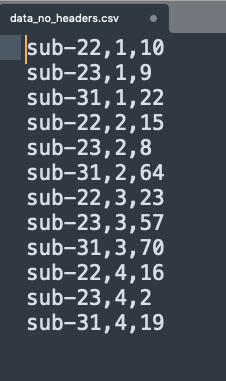
</div>
<br>
<br>

If you load this using file using the default read_csv() you can end up with your first row of data being used as column names.
   

In [32]:
# load data that has no headers
no_header_df = pd.read_csv('../pandas_intro_data/data_no_headers.csv')
no_header_df.head()

sub-22  1  10
0  sub-23  1   9
1  sub-31  1  22
2  sub-22  2  15
3  sub-23  2   8
4  sub-31  2  64

You can tell pd.read_csv() there are no headers using the optional `header=None` argument.

In [33]:
pd.read_csv('../pandas_intro_data/data_no_headers.csv', header=None)

0  1   2
0   sub-22  1  10
1   sub-23  1   9
2   sub-31  1  22
3   sub-22  2  15
4   sub-23  2   8
5   sub-31  2  64
6   sub-22  3  23
7   sub-23  3  57
8   sub-31  3  70
9   sub-22  4  16
10  sub-23  4   2
11  sub-31  4  19

If you use `header = None` and your data has column names, those column names will appear as the first row of data in your dataframe variable.

In [34]:
salary_df = pd.read_csv('../pandas_intro_data/salary.csv', 
                        sep = ",", 
                        header = None)
salary_df.head()

0       1        2      3    4             5
0  salary  gender  departm  years  age  publications
1   86285       0      bio     26   64            72
2   77125       0      bio     28   58            43
3   71922       0      bio     10   38            23
4   70499       0      bio     16   46            64

Sometimes, datasets may have multiple headers. (e.g., both the first and second rows of the dataset list column names). `pd.read_csv` allows you to keep both rows as headers by modifying the `header` argument with a list of integers. Remember that 0 actually means the first row. 

<div class="alert alert-warning" role="alert">
When creating your own dataset, refrain from using characters like a comma, a space, or a period (.) in the column names.  This will make things easier for you down the line when using Pandas for statistical modeling. 
</div>

## df.head(), df.tail()
### Viewing the data in a dataframe, as first or last 5 rows

In [35]:
# load a fresh dataframe
salary_df = pd.read_csv('../pandas_intro_data/salary.csv')

There are several ways to look at the data to check it was properly read in and also to learn more about the structure of this dataset.  

The simplest method is simply to type the name of the dataframe variable by itself in a code cell or as the last entry in a cell:

In [36]:
salary_df = pd.read_csv('../pandas_intro_data/salary.csv')
salary_df

salary  gender departm  years   age  publications
0    86285       0     bio   26.0  64.0            72
1    77125       0     bio   28.0  58.0            43
2    71922       0     bio   10.0  38.0            23
3    70499       0     bio   16.0  46.0            64
4    66624       0     bio   11.0  41.0            23
..     ...     ...     ...    ...   ...           ...
72   53662       1   neuro    1.0  31.0             3
73   57185       1    stat    9.0  39.0             7
74   52254       1    stat    2.0  32.0             9
75   61885       1    math   23.0  60.0             9
76   49542       1    math    3.0  33.0             5

[77 rows x 6 columns]

This outputs a "table" view of the dataframe showing the column names.  It doesn't show you **all** of the data at once because in many large files this would be too much to make sense of.

You can also specifically request the first several rows of the dataframe. The "head" of the dataframe is the top:

In [37]:
salary_df.head()

salary  gender departm  years   age  publications
0   86285       0     bio   26.0  64.0            72
1   77125       0     bio   28.0  58.0            43
2   71922       0     bio   10.0  38.0            23
3   70499       0     bio   16.0  46.0            64
4   66624       0     bio   11.0  41.0            23

The "tail" of the dataframe is the bottom.

In [38]:
salary_df.tail()

salary  gender departm  years   age  publications
72   53662       1   neuro    1.0  31.0             3
73   57185       1    stat    9.0  39.0             7
74   52254       1    stat    2.0  32.0             9
75   61885       1    math   23.0  60.0             9
76   49542       1    math    3.0  33.0             5

If you don't give an input to the head() or tail() function they will display the first (or last) 5 rows. If you give a number you'll get that many rows:

In [39]:
salary_df.head(2)

salary  gender departm  years   age  publications
0   86285       0     bio   26.0  64.0            72
1   77125       0     bio   28.0  58.0            43

## df['column_name'] Accessing dataframe columns

To access a single column you can index it like a Python dictionary, using the column name as a key:

In [40]:
salary_df['salary']

0     86285
1     77125
2     71922
3     70499
4     66624
      ...  
72    53662
73    57185
74    52254
75    61885
76    49542
Name: salary, Length: 77, dtype: int64

### extract one column into a variable as a ** Series**

In [41]:
age = salary_df['age']

print(age)

0     64.0
1     58.0
2     38.0
3     46.0
4     41.0
      ... 
72    31.0
73    39.0
74    32.0
75    60.0
76    33.0
Name: age, Length: 77, dtype: float64


In [42]:
type(age)

pandas.core.series.Series

This returns a new data type which is a **Series**. Pandas Series objects can be very useful and they have many methods attached to them that enable operating on the data.

In [44]:
# get the min and max values in a column
salary_df['age'].min()

31.0

In [45]:
salary_df['age'].max()

65.0

In [46]:
age.mean()

45.48684210526316

In [47]:
age.std()

9.005914236104527

In [ ]:
# get the mean() or average of the values in a column

## series.to_list() Convert a series to a list 

Pandas **series** datatypes can be useful, but sometimes they are overcomplicated and you just want the values from a column in a list. The `series.to_list()` method will do this for you.

In [48]:
age_list = age.to_list()
age_list

[64.0,
 58.0,
 38.0,
 46.0,
 41.0,
 60.0,
 53.0,
 40.0,
 38.0,
 50.0,
 40.0,
 43.0,
 56.0,
 38.0,
 64.0,
 61.0,
 65.0,
 56.0,
 nan,
 45.0,
 56.0,
 48.0,
 34.0,
 34.0,
 50.0,
 41.0,
 37.0,
 38.0,
 44.0,
 39.0,
 41.0,
 49.0,
 46.0,
 40.0,
 41.0,
 37.0,
 45.0,
 44.0,
 48.0,
 38.0,
 41.0,
 53.0,
 53.0,
 38.0,
 41.0,
 56.0,
 50.0,
 50.0,
 58.0,
 58.0,
 59.0,
 48.0,
 32.0,
 35.0,
 50.0,
 37.0,
 32.0,
 53.0,
 56.0,
 50.0,
 51.0,
 49.0,
 39.0,
 53.0,
 44.0,
 38.0,
 42.0,
 35.0,
 38.0,
 48.0,
 34.0,
 35.0,
 31.0,
 39.0,
 32.0,
 60.0,
 33.0]

In [49]:
print(type(age))
print(type(age_list))

<class 'pandas.core.series.Series'>
<class 'list'>


### Preview: pandas dataframes interface with seaborn plotting library

We'll return to this next week when we do more detailed plotting. 

For now just watch how we can make a "categorial plot" showing the distribution or mean of some variable (like salary) in each of some categories (like department) or a scatterplot of two continuous variables like salary versus number of publications.

In [55]:
salary_df.head(3)

salary  gender departm  years   age  publications
0   86285       0     bio   26.0  64.0            72
1   77125       0     bio   28.0  58.0            43
2   71922       0     bio   10.0  38.0            23

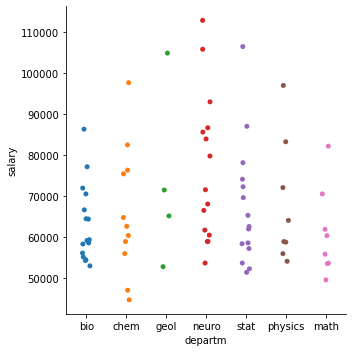

In [57]:
# categorical plot
sns.catplot(x='departm', y='salary', data=salary_df)

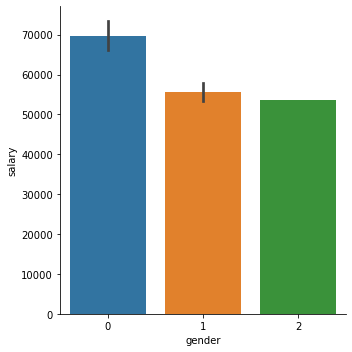

In [63]:
sns.catplot(x='gender', y='salary', data = salary_df, kind = 'bar')

In [61]:
help('seaborn.catplot')

Help on function catplot in seaborn:

seaborn.catplot = catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x000002140464C0D0>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)
    Figure-level interface for drawing categorical plots onto a FacetGrid.
    
    This function provides access to several axes-level functions that
    show the relationship between a numerical and one or more categorical
    variables using one of several visual representations. The ``kind``
    parameter selects the underlying axes-level function to use:
    
    Categorical scatterplots:
    
    - :func:`stripplot` (with ``kind="strip"``; the default)
    - :func:`swarmplot` (with ``kind="swarm"``)
    
    Categorical d

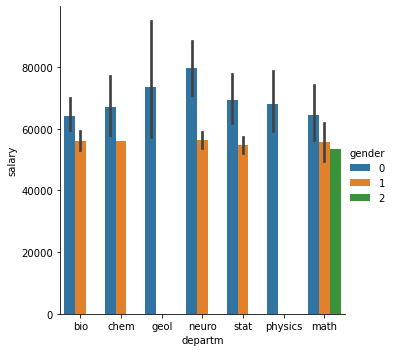

In [66]:
sns.catplot(x='departm', y='salary', hue='gender', data=salary_df,kind='bar')

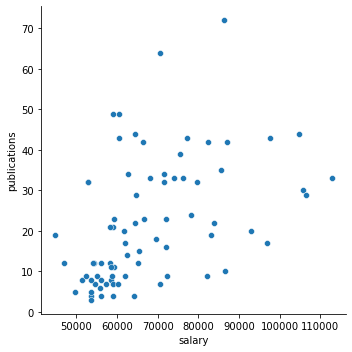

In [67]:
sns.relplot(x='salary', y='publications', data=salary_df)

<AxesSubplot:xlabel='salary', ylabel='publications'>

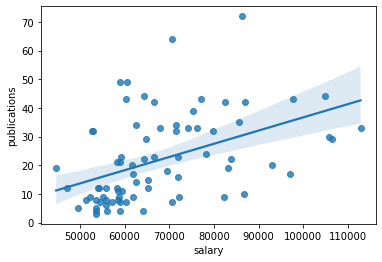

In [64]:
# scatterplot with best fitting regression line:
sns.regplot(x='salary', y='publications', data=salary_df)

## Accessing individual rows in a dataframe

In [50]:
# view the top of the dataframe using head()
salary_df.head(3)

salary  gender departm  years   age  publications
0   86285       0     bio   26.0  64.0            72
1   77125       0     bio   28.0  58.0            43
2   71922       0     bio   10.0  38.0            23

## df.iloc[], for single row

The best way to look up a single row is to use the `.iloc[]` syntax that is attached to each data frame object.

You pass the integer row number you want to access (zero indexed).  So to get the first row you type:

In [51]:
salary_df.iloc[0]

salary          86285
gender              0
departm           bio
years            26.0
age              64.0
publications       72
Name: 0, dtype: object

The output is a pandas _series_ which we've briefly introduced. It's kind of like a supercharged list combined with a dictionary. 

To get the value for one of the variables or columns you can use square bracket naming of the desired column:

In [68]:
salary_df.iloc[0]['salary']

86285

Indexing rows in this way is the same as indexing strings and lists: starts at zero, ends at the number of rows minus 1, and reverse indexing can be used starting at -1.

## df.set_index('column'), Indexes and Columns
## df.loc('level of the column'), get specific value in index

In [69]:
# take a look at the salary_df structure:
salary_df.head(3)

salary  gender departm  years   age  publications
0   86285       0     bio   26.0  64.0            72
1   77125       0     bio   28.0  58.0            43
2   71922       0     bio   10.0  38.0            23

There are two special elements of a normal dataframe called the **row index** and the **column index** (or just index).  

- **row index**: the column on the left that has no name but seems like a counter of the rows (e.g., 0, 1, 2, ...).  The row index is useful in Pandas dataframes for looking things up by row.  

In the salary_df the row index looks like ascending numbers, but the row index can be made of arbitrary types of data including strings, etc.

We'll return to using this later, but for now just notice that we can move a column to be the row index and reset the index to be row numbers.

In [70]:
# check the current index and it's a Range
salary_df.index

RangeIndex(start=0, stop=77, step=1)

In [71]:
# set the index to be the 'departm' row
# use put the result in a new variable
salary_reindexed = salary_df.set_index('departm')
salary_reindexed.head()

salary  gender  years   age  publications
departm                                           
bio       86285       0   26.0  64.0            72
bio       77125       0   28.0  58.0            43
bio       71922       0   10.0  38.0            23
bio       70499       0   16.0  46.0            64
bio       66624       0   11.0  41.0            23

Now the row index is a string corresponding to department and we could access rows with a particular index value using .loc[]

In [73]:
salary_reindexed.loc['bio']

salary  gender  years   age  publications
departm                                           
bio       86285       0   26.0  64.0            72
bio       77125       0   28.0  58.0            43
bio       71922       0   10.0  38.0            23
bio       70499       0   16.0  46.0            64
bio       66624       0   11.0  41.0            23
bio       64451       0   23.0  60.0            44
bio       64366       0   23.0  53.0            22
bio       59344       0    5.0  40.0            11
bio       58560       0    8.0  38.0             8
bio       58294       0   20.0  50.0            12
bio       56092       0    2.0  40.0             4
bio       54452       0   13.0  43.0             7
bio       54269       0   26.0  56.0            12
bio       55125       0    8.0  38.0             9
bio       59139       1    8.0  38.0            23
bio       52968       1   18.0  48.0            32

## df.reset_index() Resetting the index

We'll return to using label based indices in later sections.

If you have label based index and want to reset to rows you can use the data frame `reset_index()` method

In [74]:
salary_reindexed.head()

salary  gender  years   age  publications
departm                                           
bio       86285       0   26.0  64.0            72
bio       77125       0   28.0  58.0            43
bio       71922       0   10.0  38.0            23
bio       70499       0   16.0  46.0            64
bio       66624       0   11.0  41.0            23

Default usage of dataframe.reset_index() is to move the current index into a column and replace with integers from 0 to number of rows minus one.

In [75]:
salary_reindexed.reset_index()

departm  salary  gender  years   age  publications
0      bio   86285       0   26.0  64.0            72
1      bio   77125       0   28.0  58.0            43
2      bio   71922       0   10.0  38.0            23
3      bio   70499       0   16.0  46.0            64
4      bio   66624       0   11.0  41.0            23
..     ...     ...     ...    ...   ...           ...
72   neuro   53662       1    1.0  31.0             3
73    stat   57185       1    9.0  39.0             7
74    stat   52254       1    2.0  32.0             9
75    math   61885       1   23.0  60.0             9
76    math   49542       1    3.0  33.0             5

[77 rows x 6 columns]

### df.reset_index() is not an "inplace" operation
### df.reset_index() assign to other variable
### or df.reset_index(inplace=True)

To work with the result you need to use the reset_index() inplace=True argument or put the result into a variable.

In [76]:
# output to a new variable
salary_int_indexed = salary_reindexed.reset_index()
salary_int_indexed.head()

departm  salary  gender  years   age  publications
0     bio   86285       0   26.0  64.0            72
1     bio   77125       0   28.0  58.0            43
2     bio   71922       0   10.0  38.0            23
3     bio   70499       0   16.0  46.0            64
4     bio   66624       0   11.0  41.0            23

In [77]:
# salary_reindexed hasn't changed:
salary_reindexed.head()

salary  gender  years   age  publications
departm                                           
bio       86285       0   26.0  64.0            72
bio       77125       0   28.0  58.0            43
bio       71922       0   10.0  38.0            23
bio       70499       0   16.0  46.0            64
bio       66624       0   11.0  41.0            23

In [78]:
# use inplace=True to make it stick in 
# the original data frame
salary_reindexed.head(3)


salary  gender  years   age  publications
departm                                           
bio       86285       0   26.0  64.0            72
bio       77125       0   28.0  58.0            43
bio       71922       0   10.0  38.0            23

In [79]:
salary_reindexed.reset_index(inplace=True)
salary_reindexed.head(3)


departm  salary  gender  years   age  publications
0     bio   86285       0   26.0  64.0            72
1     bio   77125       0   28.0  58.0            43
2     bio   71922       0   10.0  38.0            23

That reset the index to be numeric, and it took the old index and added it as a column ('departm')

### Finding out which columns are in the data 

The df.columns _attribute_ returns the name of all of the columns.

In [80]:
salary_df.columns

Index(['salary', 'gender', 'departm', 'years', 'age', 'publications'], dtype='object')

In [82]:
type(salary_df.columns)

pandas.core.indexes.base.Index

Boolean membership operators can be used to check if some column name is in the dataframe

In [83]:
'age' in salary_df.columns

True

In [85]:
st = 'x'
if st not in salary_df.columns:
    print(f"missing {st} data")

missing x data


## df.to_csv(), Saving a dataframe back to a csv file

Pandas provides an easy method for saving a dataframe to a csv file:

`<df_name>.to_csv()`

Notice that to_csv() is a method that is attached to individual dataframes.

At minimum it takes the path and filename that you would like to use for the output.

In [86]:
# make a revised version of salary_df
salary_df.head(2)

salary  gender departm  years   age  publications
0   86285       0     bio   26.0  64.0            72
1   77125       0     bio   28.0  58.0            43

In [87]:
# reset the index
revised_df = salary_df.set_index('departm')
revised_df.head()

salary  gender  years   age  publications
departm                                           
bio       86285       0   26.0  64.0            72
bio       77125       0   28.0  58.0            43
bio       71922       0   10.0  38.0            23
bio       70499       0   16.0  46.0            64
bio       66624       0   11.0  41.0            23

## df.drop(), Delete a column

`df.drop(columns = 'name of column to delete', inplace=True/False)`

Set inplace to True to make changes to the calling dataframe, False to output the results into a new dataframe variable.

To delete multiple columns the input to columns= should be a list of column names.

In [90]:
# get rid of the gender column
revised_df.drop(columns = ['age','years'], inplace=False)
revised_df.head()

salary  years   age  publications
departm                                   
bio       86285   26.0  64.0            72
bio       77125   28.0  58.0            43
bio       71922   10.0  38.0            23
bio       70499   16.0  46.0            64
bio       66624   11.0  41.0            23

In [89]:
revised_df

salary  years   age  publications
departm                                   
bio       86285   26.0  64.0            72
bio       77125   28.0  58.0            43
bio       71922   10.0  38.0            23
bio       70499   16.0  46.0            64
bio       66624   11.0  41.0            23
...         ...    ...   ...           ...
neuro     53662    1.0  31.0             3
stat      57185    9.0  39.0             7
stat      52254    2.0  32.0             9
math      61885   23.0  60.0             9
math      49542    3.0  33.0             5

[77 rows x 4 columns]

Save the dataframe to a csv file located one level up from this notebook in the data folder

In [91]:
revised_df.to_csv('../pandas_intro_data/revised_salary.csv')

In [93]:
revised_df['years']

departm
bio      26.0
bio      28.0
bio      10.0
bio      16.0
bio      11.0
         ... 
neuro     1.0
stat      9.0
stat      2.0
math     23.0
math      3.0
Name: years, Length: 77, dtype: float64

In [94]:
revised_df

TypeError: 'DataFrame' object is not callable

### Summary

This notebook introduces the Pandas library:

- loading csv files **pd.read_csv()**
- the rows and columns of a dataframe **df.iloc(#of row), df['column name']**
- accessing a column of data **, df.set_index('column')->df.loc('level of the column')**
- saving a dataframe to a csv file **df.to_csv**